# Q2 (website like amazon)

In [1]:
# Importing requests to extract content from a url
import requests
# Beautifulsoup is for web scrapping...used to scrap specific content
from bs4 import BeautifulSoup as bs  
import re 
iphone_reviews=[]

In [2]:
iphone_snapdeal=[]
url1 = "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2 = "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
  ip=[]  
  base_url = url1+str(i)+url2
  response = requests.get(base_url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  temp = soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
  for j in range(len(temp)):
    ip.append(temp[j].find("p").text)
  iphone_snapdeal=iphone_snapdeal+ip

In [3]:
### Removing repeated reviews 
iphone_snapdeal = list(set(iphone_snapdeal))

In [4]:
# Writing reviews into text file 
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

In [5]:
iphone_snapdeal

['Worth buying from snap deal due to its competitive price and good service\nThanks sd for the phone at this price',
 'got this at a great discount, the phone is worth it. my wife wanted to try an iphone and she is loving it now',
 'Easy and quick returns...\nOriginal products...\n\nGood job snapdeal...keep it up!!!',
 'The product supplied by Snapdeal is very good at best price. It is as shown',
 'I am really happy with product',
 'Marvallous Phone...Ever used....You must buy',
 'Pros : Picture quality is awesome, sound with hearing ad is good, look and feel is good \n \ncons: You cannot transfer files using bluetooth from andriod/blackberry/windows to iphone, You have to use some file transfer app like shareit.\n\nOther is good. I am new to iphone so till now this is it.\n\niPhone 5c + Snapdeal before time delivery = 4 stars',
 'Good Product, Do not hang. Samsung products are pathetic. Used Grand Qauttro which use to take 20-30 seconds to open even contact list.\n\nApple is quality p

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.tokenize import TweetTokenizer
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [7]:
ip_snapd=pd.read_csv('ip_snapdeal.txt',encoding='Latin-1')
ip_snapd

,['Worth buying from snap deal due to its competitive price and good service\nThanks sd for the phone at this price','got this at a great discount,the phone is worth it. my wife wanted to try an iphone and she is loving it now','Easy and quick returns...\nOriginal products...\n\nGood job snapdeal...keep it up!!!','The product supplied by Snapdeal is very good at best price. It is as shown','I am really happy with product','Marvallous Phone...Ever used....You must buy','Pros : Picture quality is awesome,sound with hearing ad is good,look and feel is good \n \ncons: You cannot transfer files using bluetooth from andriod/blackberry/windows to iphone,...,'This a great experience to have a iphone,Snapdeal delivery was above expectation !!','Superb model,snapdeal delivered as promised time','I have got ths phone in perfect condition and thank you snapdeal for perfect elivery.i guess ur are earning the trust back','I am very much happy with my product thanks to SNEPDEAL.','Good Price. Great Seller. Genuine Product. Fast Shipping. Recommended*****','Awesome iphone in this price range.\ni would recommend this phone','it is simple \nall the thing that u need it having it \nI have buy it 2 year before from snapdeal and still it is in perfect condition.\nno lagging till today\nsuitable for your business need.','Best phone my iPhone']


**text processing**

In [8]:
ip_snapd=' '.join(ip_snapd)
ip_snapd

'[\'Worth buying from snap deal due to its competitive price and good service\\nThanks sd for the phone at this price\'  \'got this at a great discount  the phone is worth it. my wife wanted to try an iphone and she is loving it now\'  \'Easy and quick returns...\\nOriginal products...\\n\\nGood job snapdeal...keep it up!!!\'  \'The product supplied by Snapdeal is very good at best price. It is as shown\'  \'I am really happy with product\'  \'Marvallous Phone...Ever used....You must buy\'  \'Pros : Picture quality is awesome  sound with hearing ad is good  look and feel is good \\n \\ncons: You cannot transfer files using bluetooth from andriod/blackberry/windows to iphone  You have to use some file transfer app like shareit.\\n\\nOther is good. I am new to iphone so till now this is it.\\n\\niPhone 5c + Snapdeal before time delivery = 4 stars\'  \'Good Product  Do not hang. Samsung products are pathetic. Used Grand Qauttro which use to take 20-30 seconds to open even contact list.\\n

In [9]:
# Remove Punctuations 
no_punc_text=ip_snapd.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Worth buying from snap deal due to its competitive price and good servicenThanks sd for the phone at this price  got this at a great discount  the phone is worth it my wife wanted to try an iphone and she is loving it now  Easy and quick returnsnOriginal productsnnGood job snapdealkeep it up  The product supplied by Snapdeal is very good at best price It is as shown  I am really happy with product  Marvallous PhoneEver usedYou must buy  Pros  Picture quality is awesome  sound with hearing ad is good  look and feel is good n ncons You cannot transfer files using bluetooth from andriodblackberrywindows to iphone  You have to use some file transfer app like shareitnnOther is good I am new to iphone so till now this is itnniPhone 5c  Snapdeal before time delivery  4 stars  Good Product  Do not hang Samsung products are pathetic Used Grand Qauttro which use to take 2030 seconds to open even contact listnnApple is quality product Only problem is you need to pay for everything  I am very ver

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
# remove https or url within text
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'Worth buying from snap deal due to its competitive price and good servicenThanks sd for the phone at this price  got this at a great discount  the phone is worth it my wife wanted to try an iphone and she is loving it now  Easy and quick returnsnOriginal productsnnGood job snapdealkeep it up  The product supplied by Snapdeal is very good at best price It is as shown  I am really happy with product  Marvallous PhoneEver usedYou must buy  Pros  Picture quality is awesome  sound with hearing ad is good  look and feel is good n ncons You cannot transfer files using bluetooth from andriodblackberrywindows to iphone  You have to use some file transfer app like shareitnnOther is good I am new to iphone so till now this is itnniPhone 5c  Snapdeal before time delivery  4 stars  Good Product  Do not hang Samsung products are pathetic Used Grand Qauttro which use to take 2030 seconds to open even contact listnnApple is quality product Only problem is you need to pay for everything  I am very ver

In [12]:

text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['Worth', 'buying', 'from', 'snap', 'deal', 'due', 'to', 'its', 'competitive', 'price', 'and', 'good', 'servicenThanks', 'sd', 'for', 'the', 'phone', 'at', 'this', 'price', 'got', 'this', 'at', 'a', 'great', 'discount', 'the', 'phone', 'is', 'worth', 'it', 'my', 'wife', 'wanted', 'to', 'try', 'an', 'iphone', 'and', 'she', 'is', 'loving', 'it', 'now', 'Easy', 'and', 'quick', 'returnsnOriginal', 'productsnnGood', 'job', 'snapdealkeep', 'it', 'up', 'The', 'product', 'supplied', 'by', 'Snapdeal', 'is', 'very', 'good', 'at', 'best', 'price', 'It', 'is', 'as', 'shown', 'I', 'am', 'really', 'happy', 'with', 'product', 'Marvallous', 'PhoneEver', 'usedYou', 'must', 'buy', 'Pros', 'Picture', 'quality', 'is', 'awesome', 'sound', 'with', 'hearing', 'ad', 'is', 'good', 'look', 'and', 'feel', 'is', 'good', 'n', 'ncons', 'You', 'can', 'not', 'transfer', 'files', 'using', 'bluetooth', 'from', 'andriodblackberrywindows', 'to', 'iphone', 'You', 'have', 'to', 'use', 'some', 'file', 'transfer', 'app', 'li

In [13]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Tokens count
len(text_tokens)

1573

In [15]:
# Remove Stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Worth', 'buying', 'snap', 'deal', 'due', 'competitive', 'price', 'good', 'servicenThanks', 'sd', 'phone', 'price', 'got', 'great', 'discount', 'phone', 'worth', 'wife', 'wanted', 'try', 'iphone', 'loving', 'Easy', 'quick', 'returnsnOriginal', 'productsnnGood', 'job', 'snapdealkeep', 'The', 'product', 'supplied', 'Snapdeal', 'good', 'best', 'price', 'It', 'shown', 'really', 'happy', 'product', 'Marvallous', 'PhoneEver', 'usedYou', 'must', 'buy', 'Pros', 'Picture', 'quality', 'awesome', 'sound', 'hearing', 'ad', 'good', 'look', 'feel', 'good', 'n', 'ncons', 'You', 'transfer', 'files', 'using', 'bluetooth', 'andriodblackberrywindows', 'iphone', 'You', 'use', 'file', 'transfer', 'app', 'like', 'shareitnnOther', 'good', 'new', 'iphone', 'till', 'itnniPhone', '5c', 'Snapdeal', 'time', 'delivery', '4', 'stars', 'Good', 'Product', 'Do', 'hang', 'Samsung', 'products', 'pathetic', 'Used', 'Grand', 'Qauttro', 'use', 'take', '2030', 'seconds', 'open', 'even', 'contact', 'listnnApple', 'quality',

In [16]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['listnnapple', 'quality', 'product', 'only', 'problem', 'need', 'pay', 'everything', 'happy', 'iphone', 'ordering', 'phone', 'little', 'doubt', 'but', 'receiving', 'phone', 'really', 'happyalso', 'found', 'original', 'iphoneearlier', 'doubted', 'this', 'first', 'iphone', 'bought', 'after', 'using', 'android', '3', 'years', 'satisfied', 'performance', 'so', 'thought', 'going', 'iphone', 'though', 'didnt', 'want', 'go', 'iphone', '6s', 'costly', 'so', 'decided', 'buy', 'iphone', '5cnnsnapdeal', 'provided', 'great', 'deal', 'compared', 'sites', 'also', 'delivery', 'prompt', 'wellnnpros', 'sleek', 'phone', 'looks', 'sexy', 'lags', 'really', 'great', 'headphone', 'got', 'upgrade', 'ios', '9nncons', 'plastic', 'body', 'features', 'goodbut', 'phone', 'gets', 'heated', 'time', 'good', 'phone', 'mobile', 'oparating', 'essy', 'inter', 'net', 'fast', 'working', 'satisfied', 'buy', 'products', 'snapdeal', 'good', 'mobile', 'memory', 'filled', 'faster', '8gb', 'limit', 'goood']


In [17]:
# Stemming (Optional)
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['listnnappl', 'qualiti', 'product', 'onli', 'problem', 'need', 'pay', 'everyth', 'happi', 'iphon', 'order', 'phone', 'littl', 'doubt', 'but', 'receiv', 'phone', 'realli', 'happyalso', 'found', 'origin', 'iphoneearli', 'doubt', 'thi', 'first', 'iphon', 'bought', 'after', 'use', 'android', '3', 'year', 'satisfi', 'perform', 'so', 'thought', 'go', 'iphon', 'though', 'didnt', 'want', 'go', 'iphon', '6s', 'costli', 'so', 'decid', 'buy', 'iphon', '5cnnsnapdeal', 'provid', 'great', 'deal', 'compar', 'site', 'also', 'deliveri', 'prompt', 'wellnnpro', 'sleek', 'phone', 'look', 'sexi', 'lag', 'realli', 'great', 'headphon', 'got', 'upgrad', 'io', '9nncon', 'plastic', 'bodi', 'featur', 'goodbut', 'phone', 'get', 'heat', 'time', 'good', 'phone', 'mobil', 'opar', 'essi', 'inter', 'net', 'fast', 'work', 'satisfi', 'buy', 'product', 'snapdeal', 'good', 'mobil', 'memori', 'fill', 'faster', '8gb', 'limit', 'goood']


In [18]:
# Lemmatization
import spacy
from spacy.lang.en.examples import sentences
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

worth buying snap deal due competitive price good servicenthanks sd phone price got great discount phone worth wife wanted try iphone loving easy quick returnsnoriginal productsnngood job snapdealkeep the product supplied snapdeal good best price it shown really happy product marvallous phoneever usedyou must buy pros picture quality awesome sound hearing ad good look feel good n ncons you transfer files using bluetooth andriodblackberrywindows iphone you use file transfer app like shareitnnother good new iphone till itnniphone 5c snapdeal time delivery 4 stars good product do hang samsung products pathetic used grand qauttro use take 2030 seconds open even contact listnnapple quality product only problem need pay everything happy iphone ordering phone little doubt but receiving phone really happyalso found original iphoneearlier doubted this first iphone bought after using android 3 years satisfied performance so thought going iphone though didnt want go iphone 6s costly so decided bu

In [19]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['worth', 'buy', 'snap', 'deal', 'due', 'competitive', 'price', 'good', 'servicenthank', 'sd', 'phone', 'price', 'get', 'great', 'discount', 'phone', 'worth', 'wife', 'wanted', 'try', 'iphone', 'love', 'easy', 'quick', 'returnsnoriginal', 'productsnngood', 'job', 'snapdealkeep', 'the', 'product', 'supply', 'snapdeal', 'good', 'good', 'price', 'it', 'show', 'really', 'happy', 'product', 'marvallous', 'phoneever', 'usedyou', 'must', 'buy', 'pro', 'picture', 'quality', 'awesome', 'sound', 'hear', 'ad', 'good', 'look', 'feel', 'good', 'n', 'ncon', 'you', 'transfer', 'file', 'use', 'bluetooth', 'andriodblackberrywindow', 'iphone', 'you', 'use', 'file', 'transfer', 'app', 'like', 'shareitnnother', 'good', 'new', 'iphone', 'till', 'itnniphone', '5c', 'snapdeal', 'time', 'delivery', '4', 'star', 'good', 'product', 'do', 'hang', 'samsung', 'product', 'pathetic', 'use', 'grand', 'qauttro', 'use', 'take', '2030', 'second', 'open', 'even', 'contact', 'listnnapple', 'quality', 'product', 'only', 'p

In [20]:
clean_comments=' '.join(lemmas)
clean_comments

'worth buy snap deal due competitive price good servicenthank sd phone price get great discount phone worth wife wanted try iphone love easy quick returnsnoriginal productsnngood job snapdealkeep the product supply snapdeal good good price it show really happy product marvallous phoneever usedyou must buy pro picture quality awesome sound hear ad good look feel good n ncon you transfer file use bluetooth andriodblackberrywindow iphone you use file transfer app like shareitnnother good new iphone till itnniphone 5c snapdeal time delivery 4 star good product do hang samsung product pathetic use grand qauttro use take 2030 second open even contact listnnapple quality product only problem need pay everything happy iphone order phone little doubt but receive phone really happyalso find original iphoneearlier doubt this first iphone buy after use android 3 year satisfied performance so think go iphone though do nt want go iphone 6s costly so decide buy iphone 5cnnsnapdeal provide great deal 

In [21]:
# feature extraction
cv=CountVectorizer()
clean_commentscv=cv.fit_transform(lemmas)

In [22]:
print(cv.vocabulary_)

{'worth': 408, 'buy': 54, 'snap': 333, 'deal': 92, 'due': 109, 'competitive': 72, 'price': 257, 'good': 144, 'servicenthank': 314, 'sd': 307, 'phone': 246, 'get': 140, 'great': 149, 'discount': 101, 'wife': 400, 'wanted': 394, 'try': 381, 'iphone': 174, 'love': 194, 'easy': 111, 'quick': 280, 'returnsnoriginal': 295, 'productsnngood': 267, 'job': 182, 'snapdealkeep': 335, 'the': 358, 'product': 265, 'supply': 349, 'snapdeal': 334, 'it': 178, 'show': 323, 'really': 287, 'happy': 153, 'marvallous': 200, 'phoneever': 247, 'usedyou': 388, 'must': 213, 'pro': 262, 'picture': 249, 'quality': 278, 'awesome': 33, 'sound': 339, 'hear': 157, 'ad': 15, 'look': 193, 'feel': 126, 'ncon': 215, 'you': 412, 'transfer': 377, 'file': 127, 'use': 387, 'bluetooth': 44, 'andriodblackberrywindow': 25, 'app': 27, 'like': 189, 'shareitnnother': 317, 'new': 220, 'till': 368, 'itnniphone': 180, '5c': 7, 'time': 369, 'delivery': 97, 'star': 343, 'do': 104, 'hang': 152, 'samsung': 300, 'pathetic': 240, 'grand': 1

In [23]:
print(cv.get_feature_names()[100:200])

['dis', 'discount', 'dispatchnprosn1', 'display', 'do', 'doubt', 'doubtfull', 'dream', 'dt', 'due', 'earn', 'easy', 'eliveryi', 'emi', 'essy', 'even', 'ever', 'everyone', 'everything', 'excellent', 'expectation', 'experience', 'fake', 'family', 'fast', 'feature', 'feel', 'file', 'fill', 'find', 'finger', 'first', 'five', 'flaw', 'fraudulent', 'free', 'friend', 'fully', 'gb', 'genuine', 'get', 'getting', 'gift', 'go', 'good', 'goodbut', 'goood', 'got', 'grand', 'great', 'guess', 'hahahaha', 'hang', 'happy', 'happyalso', 'have', 'headphone', 'hear', 'heated', 'heavy', 'hesitate', 'honest', 'honestly', 'hour', 'however', 'hv', 'in', 'initially', 'int', 'interaction', 'interest', 'io', 'ios', 'ios9', 'iphone', 'iphone5c', 'iphoneearlier', 'issue', 'it', 'item', 'itnniphone', 'its', 'job', 'lack', 'lag', 'lagging', 'late', 'leave', 'level', 'like', 'limit', 'listnnapple', 'little', 'look', 'love', 'lovely', 'low', 'make', 'manufacturer', 'mark']


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
print(clean_commentscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
print(clean_commentscv.toarray().shape)

(1028, 413)


 **n-gram**

In [26]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [27]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['100', '5c', 'also', 'amazing', 'and', 'apple', 'available', 'awesome', 'body', 'box', 'brand', 'bt', 'budget', 'but', 'buy', 'camera', 'cheap', 'condition', 'day', 'deal', 'deliver', 'delivery', 'do', 'even', 'excellent', 'experience', 'fast', 'feel', 'file', 'fill', 'first', 'free', 'gb', 'genuine', 'get', 'go', 'good', 'got', 'great', 'happy', 'io', 'iphone', 'issue', 'it', 'its', 'job', 'late', 'like', 'look', 'low', 'memory', 'mobile', 'money', 'must', 'need', 'new', 'nice', 'nt', 'one', 'order', 'original', 'pack', 'perfect', 'phone', 'plastic', 'price', 'problem', 'product', 'provide', 'quality', 'really', 'receive', 'recommend', 'satisfied', 'seller', 'service', 'shipping', 'shop', 'site', 'snap', 'snapdeal', 'so', 'space', 'superb', 'take', 'thank', 'the', 'this', 'though', 'till', 'time', 'transfer', 'true', 'use', 'very', 'within', 'worth', 'would', 'year', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ...

In [28]:
# tfidf vectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

**Generate wordcloud**

In [29]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

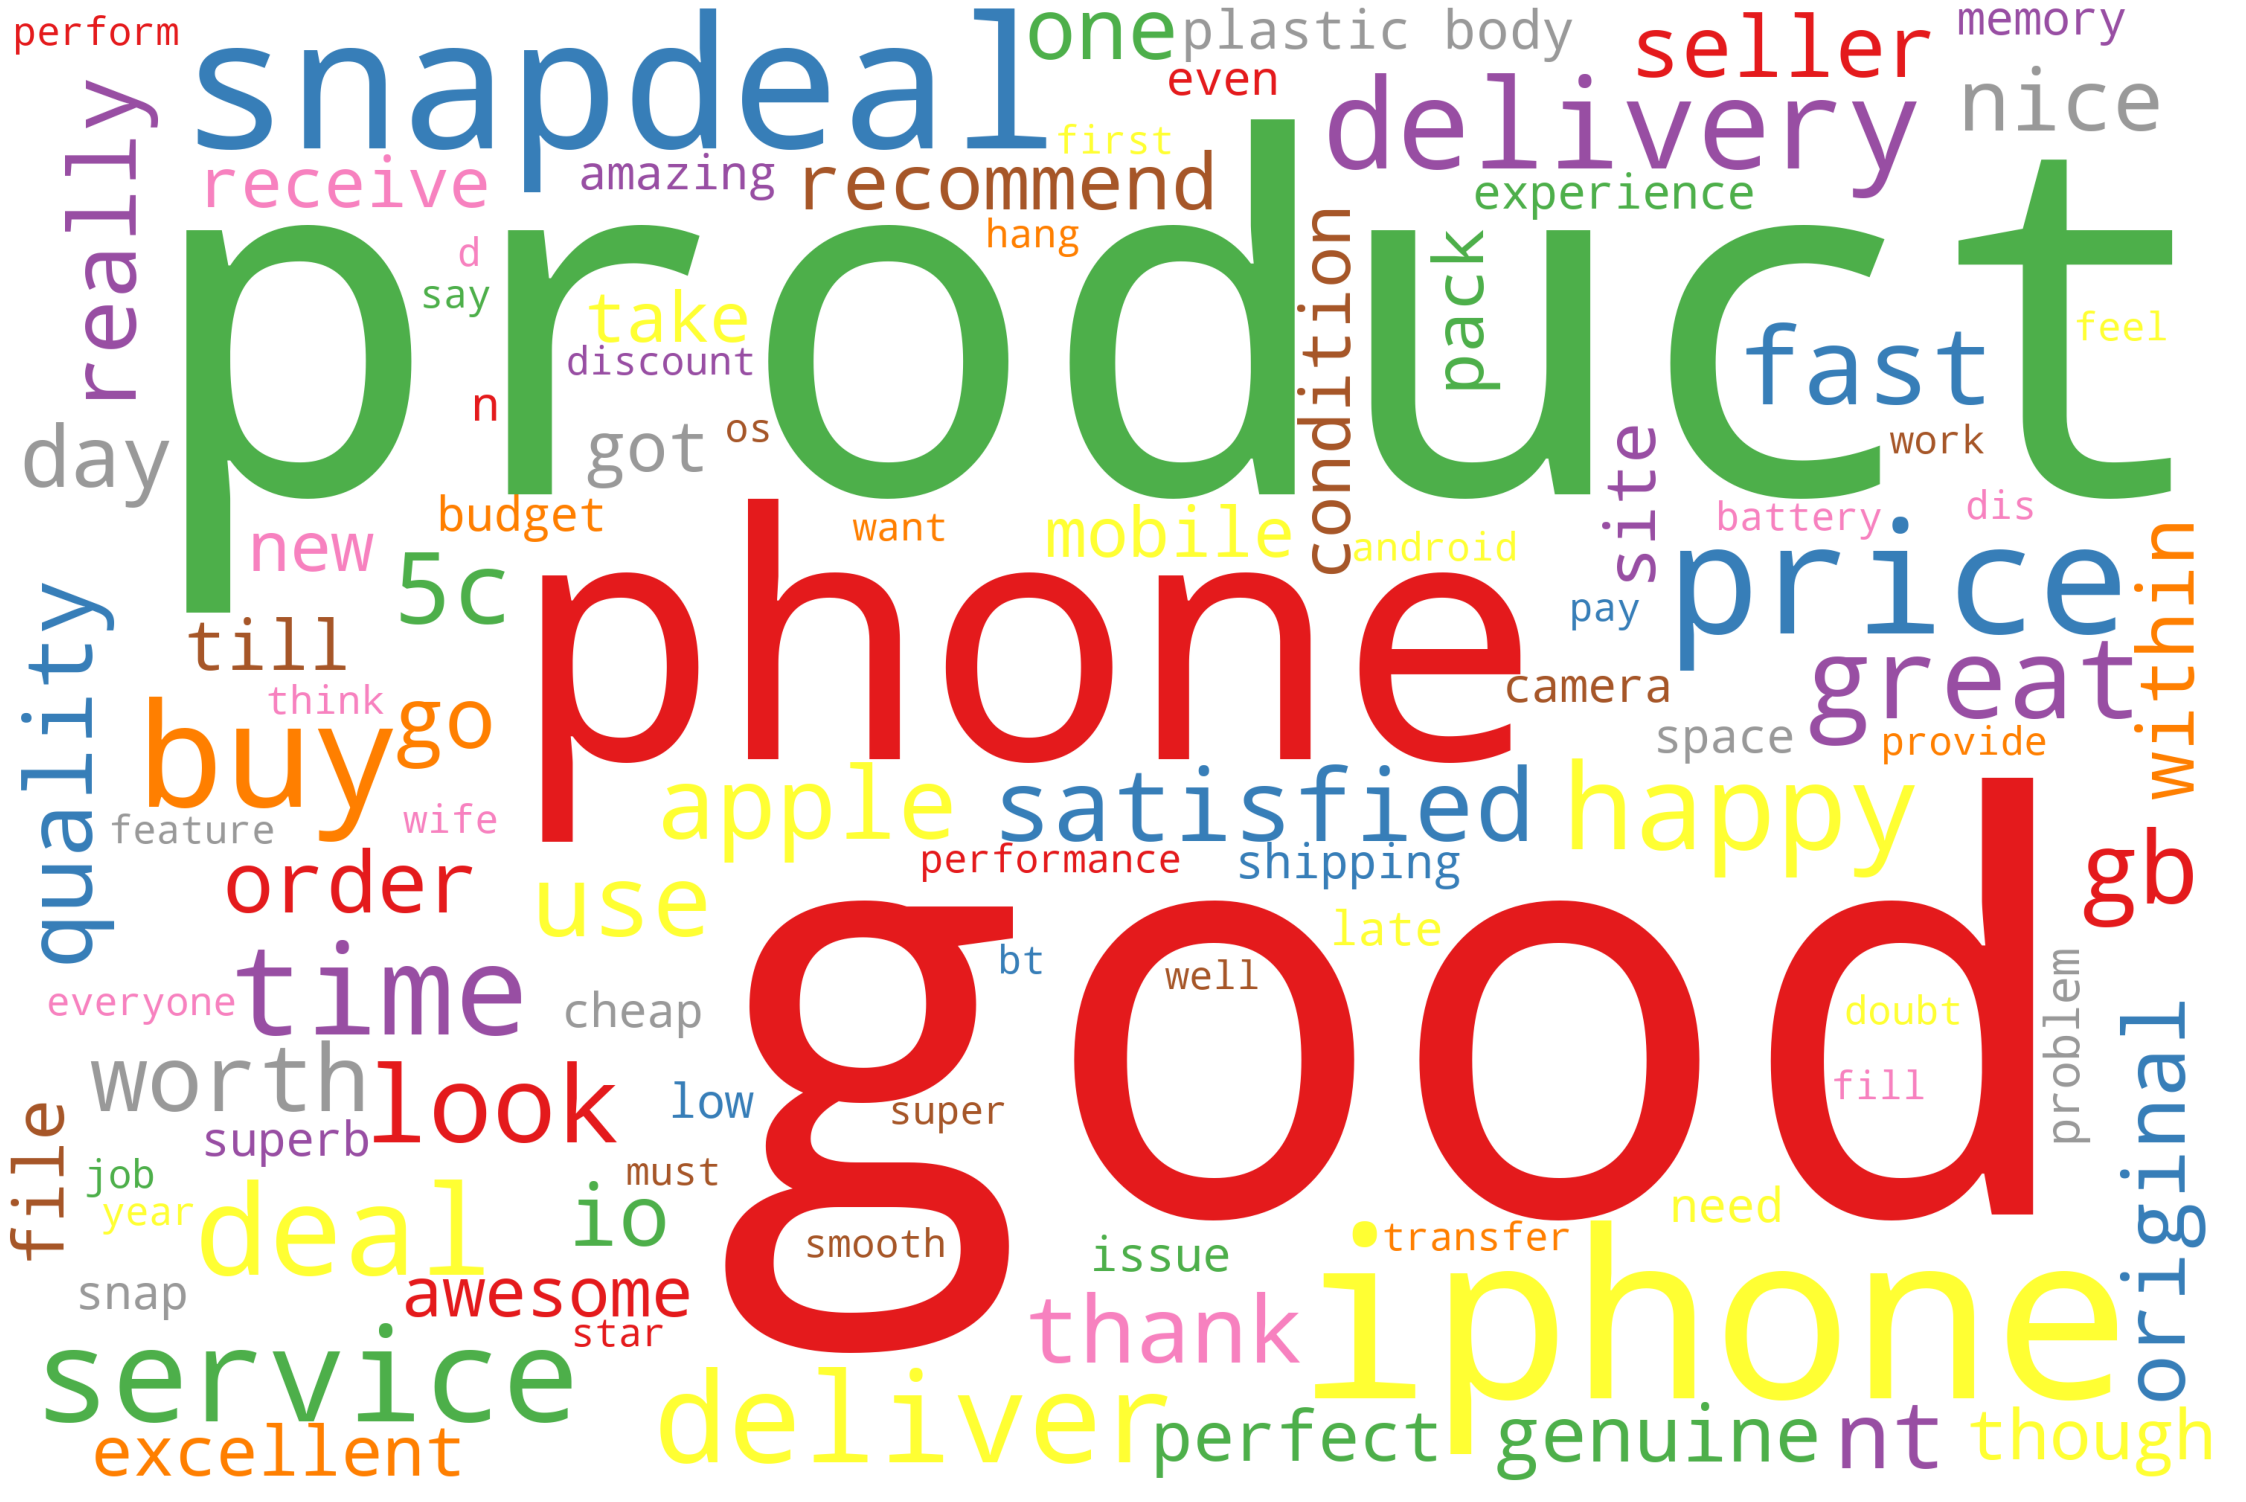

In [30]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('pron')
stopwords.add('rt')
stopwords.add('yeah')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='white', max_words=100,colormap='Set1',stopwords=stopwords).generate(clean_comments)
# Plot
plot_cloud(wordcloud)

**name entity recognition**

In [31]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_comments
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [32]:
for token in doc_block[100:200]:
    print(token,token.pos_)

listnnapple NOUN
quality NOUN
product NOUN
only ADV
problem NOUN
need AUX
pay VERB
everything PRON
happy ADJ
iphone NOUN
order NOUN
phone NOUN
little ADJ
doubt NOUN
but CCONJ
receive VERB
phone NOUN
really ADV
happyalso ADV
find VERB
original ADJ
iphoneearlier ADJ
doubt NOUN
this DET
first ADJ
iphone NOUN
buy NOUN
after ADP
use NOUN
android NOUN
3 NUM
year NOUN
satisfied ADJ
performance NOUN
so ADV
think VERB
go VERB
iphone NOUN
though ADV
do AUX
nt PART
want VERB
go VERB
iphone NOUN
6s NOUN
costly ADJ
so ADV
decide VERB
buy VERB
iphone NOUN
5cnnsnapdeal NUM
provide VERB
great ADJ
deal NOUN
compare NOUN
site NOUN
also ADV
delivery NOUN
prompt ADJ
wellnnpro ADJ
sleek ADJ
phone NOUN
look NOUN
sexy ADJ
lag NOUN
really ADV
great ADJ
headphone NOUN
got AUX
upgrade VERB
ios NOUN
9nncons NUM
plastic NOUN
body NOUN
feature NOUN
goodbut ADJ
phone NOUN
get AUX
heated ADJ
time NOUN
good ADJ
phone NOUN
mobile NOUN
oparating NOUN
essy NOUN
int NOUN
net ADJ
fast ADJ
work NOUN
satisfied ADJ
buy NOUN


In [33]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['phone', 'time', 'phone', 'mobile', 'oparating', 'essy', 'int', 'work', 'buy', 'product', 'memory', 'fill', 'gb', 'limit', 'goood', 'shipping', 'purchase', 'phone', 'bit', 'purchasing', 'tell', 'iphone', 'get', 'price', 'pack', 'seller', 'day', 'dispatchnprosn1', 'upgraden3', 'smoothn4', 'build', 'qualitynnconsn1plastic', 'bodyn2', 'gb', 'memorynnbut', 'plastic', 'body', 'look', 'premium', 'plastuc', 'use', 'go', 'phone', 'budget', '20k', 'phone', 'good', 'phone', 'look', 'consist', 'plastic', 'body', 'metal', 'body', 'look', 'mean', 'plastic', 'body', 'look', 'plastic', 'look', 'camera', 'superb', 'battery', 'dere', 'problem', 'space', 'bt', 'say', 'dis', 'phone', 'problem', 'choose', 'gb', 'phone', 'flaw', 'word', 'say', 'phone', 'dis', 'price', 'thumb', 'apple', 'service', 'quality', 'level', 'interaction', 'product', 'apple', 'product', 'delivery', '2nd', 'daynand', 'iphone', 'iphone', 'product', 'price', 'delivery', 'iphone', 'service']


In [34]:
# Counting the noun & verb tokens
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
# viewing top ten results
wd_df[0:10]

,word,count
0,product,40
1,phone,28
2,iphone,28
3,price,17
4,buy,15
5,service,12
6,deal,11
7,time,11
8,delivery,11
9,deliver,11


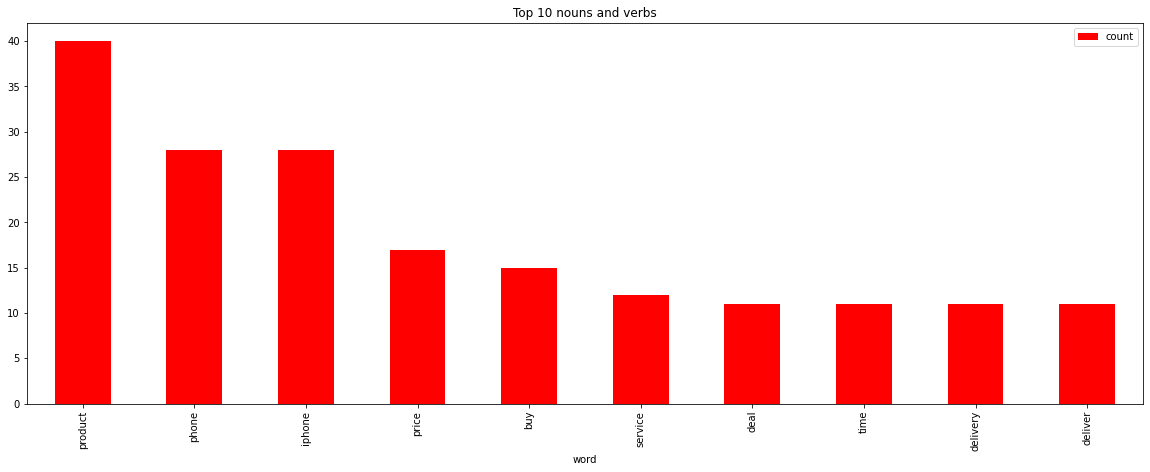

In [35]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word', figsize=(20,7), title='Top 10 nouns and verbs',color='red');

**EMOTION MINING ANALYSIS**

In [36]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(iphone_snapdeal))
sentences

['Worth buying from snap deal due to its competitive price and good service\nThanks sd for the phone at this price got this at a great discount, the phone is worth it.',
 'my wife wanted to try an iphone and she is loving it now Easy and quick returns...',
 'Original products...\n\nGood job snapdeal...keep it up!!!',
 'The product supplied by Snapdeal is very good at best price.',
 'It is as shown I am really happy with product Marvallous Phone...Ever used....You must buy Pros : Picture quality is awesome, sound with hearing ad is good, look and feel is good \n \ncons: You cannot transfer files using bluetooth from andriod/blackberry/windows to iphone, You have to use some file transfer app like shareit.',
 'Other is good.',
 'I am new to iphone so till now this is it.',
 'iPhone 5c + Snapdeal before time delivery = 4 stars Good Product, Do not hang.',
 'Samsung products are pathetic.',
 'Used Grand Qauttro which use to take 20-30 seconds to open even contact list.',
 'Apple is quality

In [37]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Worth buying from snap deal due to its competi...
1,my wife wanted to try an iphone and she is lov...
2,Original products...\n\nGood job snapdeal...ke...
3,The product supplied by Snapdeal is very good ...
4,It is as shown I am really happy with product ...
...,...
123,Fast Shipping.
124,Recommended***** Awesome iphone in this price ...
125,i would recommend this phone it is simple \nal...
126,no lagging till today\nsuitable for your busin...


In [38]:
# Emotion Lexicon - Affin
affin=pd.read_csv("D:/ExcelR/Data Science Assignments/Assignments/Text Mining/Afinn.csv",sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [39]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [40]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [41]:
# manual testing
calculate_sentiment(text='great')

3

In [42]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      14
1       5
2       3
3       6
4      15
       ..
123     0
124     2
125     5
126    -3
127     3
Name: sentiment_value, Length: 128, dtype: int64

In [43]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      32
1      17
2       7
3      11
4      53
       ..
123     2
124     7
125    33
126     9
127     4
Name: word_count, Length: 128, dtype: int64

In [44]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
109,But those all reviews are fake and just to dam...,-6,14
36,Dere is only one problem nd dat is space... Bt...,-4,20
80,Dont buy on fraudulent schemes.,-4,5
126,no lagging till today\nsuitable for your busin...,-3,9
11,Only problem is you need to pay for everything.,-3,9
...,...,...,...
0,Worth buying from snap deal due to its competi...,14,32
4,It is as shown I am really happy with product ...,15,53
118,"offer product is available, customer care also...",16,46
71,Really happy with the product and service..alw...,16,65


In [45]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    128.000000
mean       2.835938
std        4.255200
min       -6.000000
25%        0.000000
50%        2.000000
75%        3.250000
max       20.000000
Name: sentiment_value, dtype: float64

In [46]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
6,I am new to iphone so till now this is it.,0,11
7,iPhone 5c + Snapdeal before time delivery = 4 ...,0,15
8,Samsung products are pathetic.,-2,4
9,Used Grand Qauttro which use to take 20-30 sec...,0,14
10,Apple is quality product.,0,4
11,Only problem is you need to pay for everything.,-3,9
13,But after receiving this phone I am really ver...,-1,25
15,"So, thought of going for iPhone.",0,6
16,"Though, I didnt want to go for iPhone 6S as it...",-1,16
17,"So, decided that I will buy iPhone 5C.",0,8


In [47]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,Worth buying from snap deal due to its competi...,14,32
1,my wife wanted to try an iphone and she is lov...,5,17
2,Original products...\n\nGood job snapdeal...ke...,3,7
3,The product supplied by Snapdeal is very good ...,6,11
4,It is as shown I am really happy with product ...,15,53
...,...,...,...
118,"offer product is available, customer care also...",16,46
119,"Superb model , snapdeal delivered as promised ...",20,41
124,Recommended***** Awesome iphone in this price ...,2,7
125,i would recommend this phone it is simple \nal...,5,33


In [48]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Worth buying from snap deal due to its competi...,14,32,0
1,my wife wanted to try an iphone and she is lov...,5,17,1
2,Original products...\n\nGood job snapdeal...ke...,3,7,2
3,The product supplied by Snapdeal is very good ...,6,11,3
4,It is as shown I am really happy with product ...,15,53,4
...,...,...,...,...
123,Fast Shipping.,0,2,123
124,Recommended***** Awesome iphone in this price ...,2,7,124
125,i would recommend this phone it is simple \nal...,5,33,125
126,no lagging till today\nsuitable for your busin...,-3,9,126


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

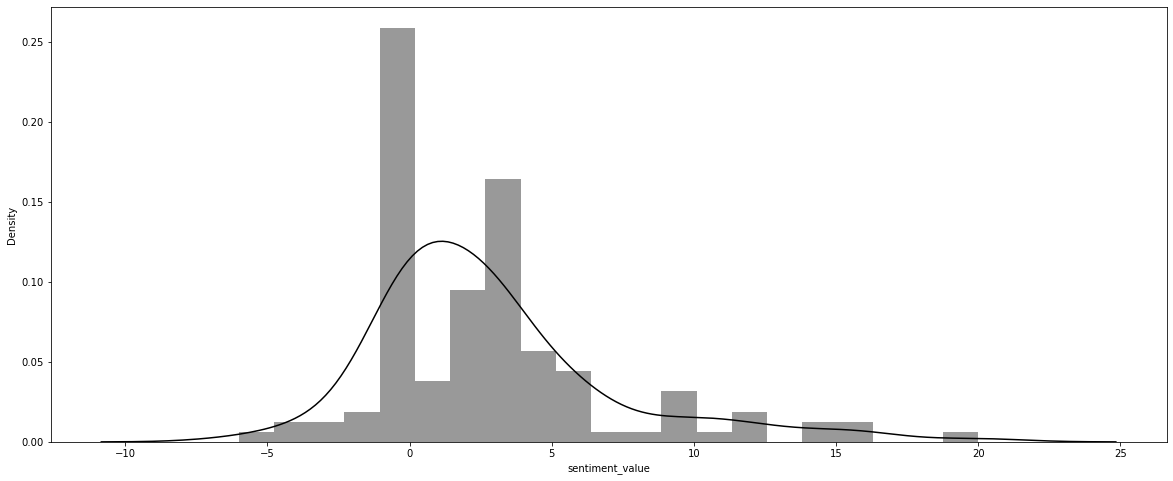

In [68]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(20,8))
sns.distplot(sent_df['sentiment_value'],color="black")

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

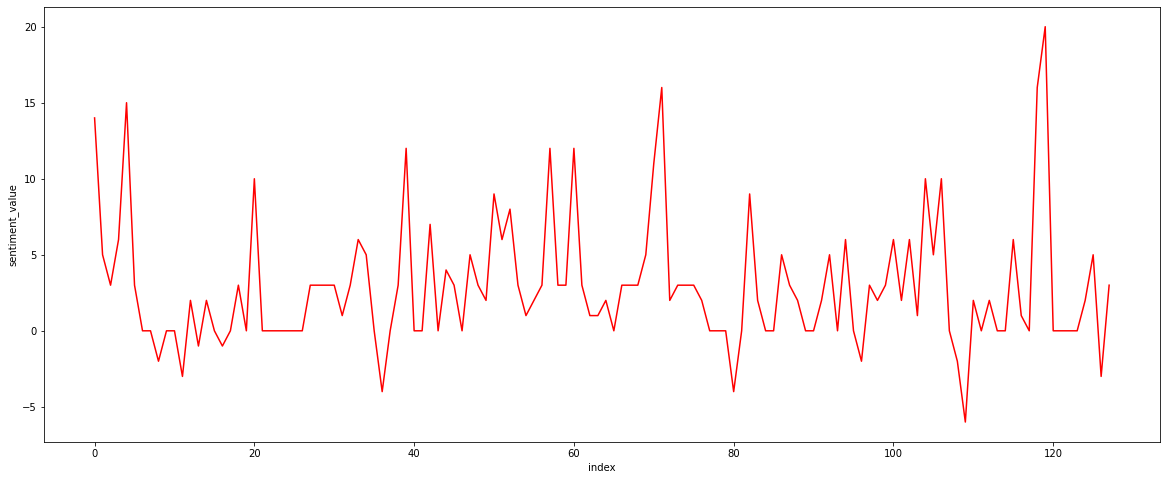

In [69]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(20,8))
sns.lineplot(y='sentiment_value',x='index',data=sent_df,color='red')

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

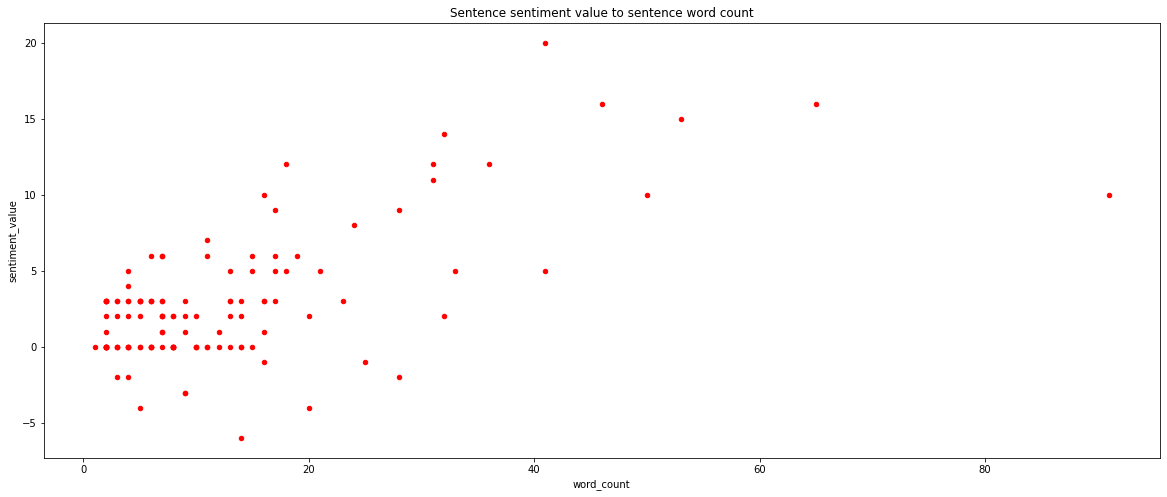

In [66]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(20,8),title='Sentence sentiment value to sentence word count',color='red')